## Face Detection and Face Recognition

In [50]:
#### Importing all the libraries

import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from skimage import data, exposure

In [51]:
#### Reading the image with the imread() function
img = cv2.imread("C:/Users/Daksha/Desktop/Bruce-Willis.jpg")

In [52]:
#### Converting image from BGR format to RGB format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

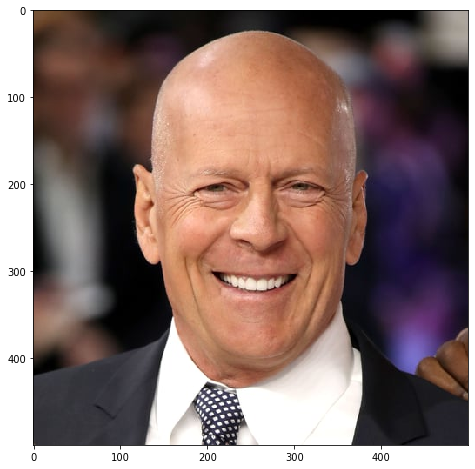

In [53]:
plt.figure(figsize=(20,8))
plt.imshow(img)

### Face Detection

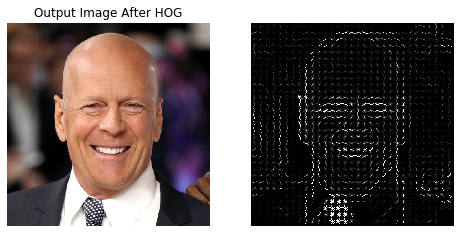

In [54]:
#### fd is the feature-descriptor(used to represent the image)
fd, hog_image = hog(img, orientations = 8,pixels_per_cell=(16,16),cells_per_block=(1,1), visualize=True, multichannel=True )

#### Plot both the input image and hog_image
fig, (pic1,pic2)= plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)

pic1.axis('off')
pic1.imshow(img, cmap=plt.cm.gray)
pic1.set_title("Input Image")

#### Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

pic2.axis('off')
pic2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
pic1.set_title("Output Image After HOG")
plt.show()

In [55]:
import face_recognition
from matplotlib.patches import Rectangle
import numpy as np

In [56]:
#### To find all the faces in the image
location = face_recognition.face_locations(img)
num_of_faces = len(location)
print("HURRAY, FOUND {} FACE(S) IN THE IMAGE".format(num_of_faces))

HURRAY, FOUND 1 FACE(S) IN THE IMAGE


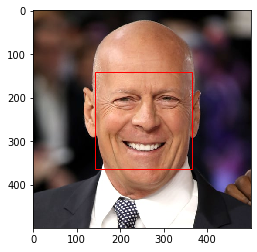

In [57]:
plt.imshow(img)

### Getting axis handle
ax = plt.gca()

#### Repeat for all faces found
for i in location:
    
    #### Print the location of each face in this image. Each face is a list of co-ordinates in(top, right,bottom, left)order
    top,right,bottom,left = i
    x,y,w,h = left,top,right,bottom
   
    #### Let's draw a box around the face
    rect = Rectangle((x,y),w-x,h-y, fill=False, color='red')
    ax.add_patch(rect)

#### Show output image
plt.show()

### Face Recognition

In [58]:
#### Reading image of Brad Pitt
image2 = cv2.imread("C:/Users/Daksha/Desktop/Brad Pitt.jpg")
pitt = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

#### Reading image of Jennifer Lawrence
image3 = cv2.imread("C:/Users/Daksha/Desktop/Jennifer_Lawrence.jpg")
jennifer = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

#### Reading image of Bruce Willis
image4 = cv2.imread("C:/Users/Daksha/Desktop/Bruce_Wilis_2.jpg")
bruce2 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

In [59]:
#### Getting face encoding of each person.This can fail if no one is found in the photo
pitt_encoding = face_recognition.face_encodings(pitt)[0]
jennifer_encoding = face_recognition.face_encodings(jennifer)[0]
bruce2_encoding = face_recognition.face_encodings(bruce2)[0]

known_face_encodings = [
                       pitt_encoding,
                       jennifer_encoding,
                       bruce2_encoding
                       ]

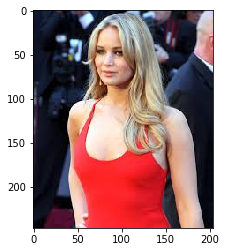

In [45]:
#### Now loading the image we want to check 
image5 = cv2.imread("C:/Users/Daksha/Desktop/Jennifer_Lawrence2.jpg")
unknown = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)
plt.imshow(unknown)

In [46]:
#### Get face encoding for the unknown image
unknown_face_encoding = face_recognition.face_encodings(unknown)

In [47]:
from scipy.spatial import distance

#### There might be more than one person in the photo, so we need to loop over each photo we find out
for i in unknown_face_encoding:
    results=[]
    
    #### Computing euclidean distance between the known and unknown images. If distance is less than threshold, then both images match
    for j in known_face_encodings:
        d=distance.euclidean(j,i)
        results.append(d)
    
    threshold=0.6
    results = np.array(results) <= threshold
    
    name = "Unknown"
    if results[0]:
        name = "Brad Pitt"
    elif results[1]:
        name = "Jennifer Lawrence"
    elif results[2]:
        name = "Bruce Willis"
    
    print(f"Found {name} in the photo")

Found Jennifer Lawrence in the photo


### YAY! the computer has successfully recognized the person in the above image as Jennifer Lawrence